In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv(r"C:\Users\prati\Downloads\mnist_train.csv")
test_df = pd.read_csv(r"C:\Users\prati\Downloads\mnist_test.csv")

In [6]:
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values

In [7]:
X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [22]:
def create_model(activation):
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256,activation = activation),
        layers.Dense(128,activation = activation),
        layers.Dense(10,activation = 'softmax')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [23]:
activations = ['sigmoid','tanh','relu']
histories = {}
for act in activations:
    print(f"Training with {act} activation")
    model = create_model(act)
    histories[act] = model.fit(
        X_train,y_train,
        validation_data = (X_test,y_test),
        epochs = 3,
        batch_size = 128,
        verbose = 2
    )

Training with sigmoid activation
Epoch 1/3
469/469 - 3s - 6ms/step - accuracy: 0.8686 - loss: 0.5323 - val_accuracy: 0.9195 - val_loss: 0.2846
Epoch 2/3
469/469 - 2s - 4ms/step - accuracy: 0.9199 - loss: 0.2782 - val_accuracy: 0.9242 - val_loss: 0.2586
Epoch 3/3
469/469 - 2s - 4ms/step - accuracy: 0.9258 - loss: 0.2515 - val_accuracy: 0.9310 - val_loss: 0.2380
Training with tanh activation
Epoch 1/3
469/469 - 3s - 5ms/step - accuracy: 0.8615 - loss: 0.4545 - val_accuracy: 0.8928 - val_loss: 0.3522
Epoch 2/3
469/469 - 2s - 3ms/step - accuracy: 0.9043 - loss: 0.3143 - val_accuracy: 0.9075 - val_loss: 0.2950
Epoch 3/3
469/469 - 2s - 4ms/step - accuracy: 0.9072 - loss: 0.3019 - val_accuracy: 0.9124 - val_loss: 0.2867
Training with relu activation
Epoch 1/3
469/469 - 2s - 5ms/step - accuracy: 0.8871 - loss: 2.4394 - val_accuracy: 0.9218 - val_loss: 0.6738
Epoch 2/3
469/469 - 1s - 3ms/step - accuracy: 0.9426 - loss: 0.4192 - val_accuracy: 0.9392 - val_loss: 0.4395
Epoch 3/3
469/469 - 1s - 3m

In [31]:
plt.figure(figsize = (20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

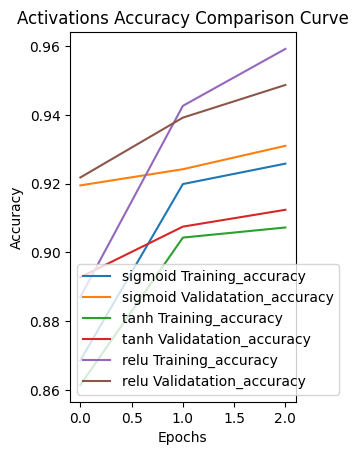

In [32]:
plt.subplot(1,2,1)
for act in activations:
    plt.plot(histories[act].history['accuracy'],label=f'{act} Training_accuracy')
    plt.plot(histories[act].history['val_accuracy'],label=f'{act} Validatation_accuracy')
plt.title('Activations Accuracy Comparison Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

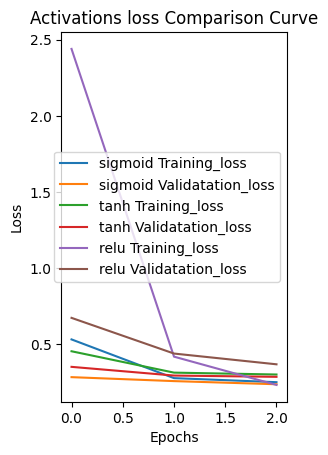

In [33]:
plt.subplot(1,2,1)
for act in activations:
    plt.plot(histories[act].history['loss'],label=f'{act} Training_loss')
    plt.plot(histories[act].history['val_loss'],label=f'{act} Validatation_loss')
plt.title('Activations loss Comparison Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [35]:
gradients = {}
for act in activations:
    model = create_model(act)
    X_batch,y_batch = X_train[:256],y_train[:256]
    with tf.GradientTape() as tape:
        preds = model(X_batch,training = True)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch,preds)
        grads = tape.gradient(loss,model.trainable_weights)

        grad_values = []
        for g in grads:
            if g is not None:
                grad_values.append(tf.reduce_mean(tf.abs(g)).numpy())
        gradients[act] = float(np.mean(grad_values))
        
        histories[act] = model.fit(
        X_train,y_train,
        validation_data = (X_test,y_test),
        epochs = 5,
        batch_size =128,
        verbose = 2
    )
        

Epoch 1/5
469/469 - 3s - 5ms/step - accuracy: 0.8660 - loss: 0.5407 - val_accuracy: 0.9169 - val_loss: 0.3003
Epoch 2/5
469/469 - 1s - 3ms/step - accuracy: 0.9190 - loss: 0.2826 - val_accuracy: 0.9236 - val_loss: 0.2664
Epoch 3/5
469/469 - 1s - 3ms/step - accuracy: 0.9241 - loss: 0.2549 - val_accuracy: 0.9266 - val_loss: 0.2493
Epoch 4/5
469/469 - 1s - 3ms/step - accuracy: 0.9312 - loss: 0.2289 - val_accuracy: 0.9295 - val_loss: 0.2318
Epoch 5/5
469/469 - 1s - 3ms/step - accuracy: 0.9303 - loss: 0.2295 - val_accuracy: 0.9290 - val_loss: 0.2325
Epoch 1/5
469/469 - 2s - 4ms/step - accuracy: 0.8604 - loss: 0.4606 - val_accuracy: 0.8933 - val_loss: 0.3474
Epoch 2/5
469/469 - 1s - 3ms/step - accuracy: 0.8964 - loss: 0.3350 - val_accuracy: 0.9090 - val_loss: 0.2941
Epoch 3/5
469/469 - 1s - 3ms/step - accuracy: 0.9079 - loss: 0.2953 - val_accuracy: 0.9203 - val_loss: 0.2563
Epoch 4/5
469/469 - 1s - 3ms/step - accuracy: 0.9184 - loss: 0.2612 - val_accuracy: 0.9156 - val_loss: 0.2745
Epoch 5/5



Average Gradient Magnitudes:
sigmoid: 2.595788
tanh: 3.750802
relu: 206.607529


Text(0.5, 1.0, 'Average Gradient Magnitudes for Different Activations')

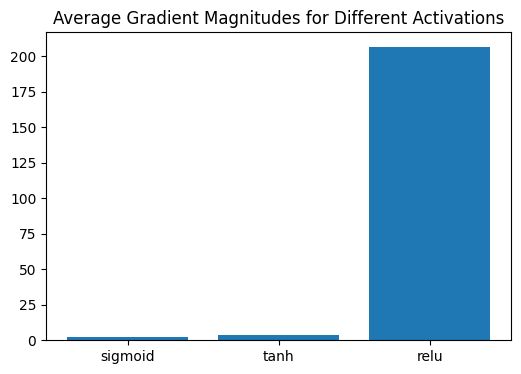

In [36]:
print("\nAverage Gradient Magnitudes:")
for act, grad in gradients.items():
    print(f"{act}: {grad:.6f}")
plt.figure(figsize=(6,4))
plt.bar(gradients.keys(), gradients.values())
plt.title('Average Gradient Magnitudes for Different Activations')